In [1]:
from pytesseract import Output

import matplotlib.pyplot as plt
import pytesseract
import cv2
import numpy as np
import csv
import os

At this point, all mapping, coordinates and needed data is parsed (if not with the previous notebooks, it is supposed so, i.e. images links are given already parsed).

Any languages could do the trick, but for continuity, python will be used to complete the task.

In [2]:
picture_ph = "../../docs/wwwroot/assets/picture.png"
name = "3"
dirName = '../websites/docs_'+name+'/'

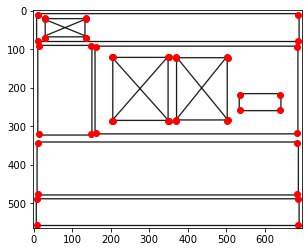

In [3]:
img = cv2.imread('../wireframes/'+ name +'.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
listCoordShapes = []
listCoords = []

i = 0
with open('../data/docs_data_shapes_clean.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        for point in row:
            if i == 0:
                i = 1
                listCoords.append(point)
                continue
            coord = point.strip('[]')
            #print(coord)
            x, y = coord.split()
            #print(type(x))
            listCoords.append((x, y))
            plt.plot(int(x), int(y), 'ro')
        listCoordShapes.append(listCoords)
        i = 0
        listCoords = []
    
plt.show()

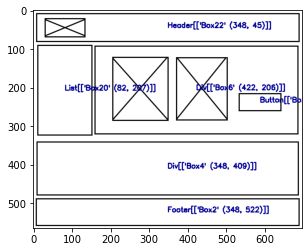

In [4]:
img = cv2.imread('../wireframes/3.png')
listMapping = []

with open('../data/docs_data_mapping_clean.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        listMapping.append(row)
        #print(row[0], row[1])
        values = row[1].strip('[]').split()
        #print(values)
        x, y = int(values[1].strip('(,')), int(values[2].strip(')'))
        #print(x, y)
        cv2.putText(img, row[0] + row[1], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (150, 0, 0), 2)
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig('../results/docs_mapping_ext.png', dpi=200)
plt.show()

In [5]:
listCoordShapes

[["[['Box2' (348, 522)]]",
  ('10', '490'),
  ('10', '555'),
  ('686', '555'),
  ('686', '490')],
 ["[['Box4' (348, 409)]]",
  ('12', '343'),
  ('12', '476'),
  ('684', '476'),
  ('684', '343')],
 ["[['Box6' (422, 206)]]",
  ('162', '95'),
  ('162', '318'),
  ('683', '318'),
  ('683', '95')],
 ["[['Box8' (587, 238)]]",
  ('535', '218'),
  ('535', '258'),
  ('639', '258'),
  ('639', '218')],
 ["[['Picture9' (436, 203)]]",
  ('369', '122'),
  ('370', '121'),
  ('503', '121'),
  ('504', '122'),
  ('504', '285'),
  ('503', '286'),
  ('370', '286'),
  ('369', '285')],
 ["[['Picture14' (277, 203)]]",
  ('204', '121'),
  ('205', '120'),
  ('350', '120'),
  ('351', '121'),
  ('351', '286'),
  ('350', '287'),
  ('205', '287'),
  ('204', '286')],
 ["[['Box20' (82, 207)]]",
  ('14', '93'),
  ('14', '321'),
  ('150', '321'),
  ('150', '93')],
 ["[['Box22' (348, 45)]]",
  ('11', '11'),
  ('11', '79'),
  ('686', '79'),
  ('686', '11')],
 ["[['Picture23' (82, 45)]]",
  ('29', '21'),
  ('30', '20'),
 

In [6]:
listMapping

[['Header', "[['Box22' (348, 45)]]"],
 ['List', "[['Box20' (82, 207)]]"],
 ['Div', "[['Box6' (422, 206)]]"],
 ['Button', "[['Box8' (587, 238)]]"],
 ['Div', "[['Box4' (348, 409)]]"],
 ['Footer', "[['Box2' (348, 522)]]"]]

## Compute ratios

In [7]:
h, w, c = img.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

width:   696
height:  564
channel: 3


In [8]:
ratioHeight, ratioWidth = [], []

print('Height')
for CoordsShape in listCoordShapes:
    if (CoordsShape[0].find('Picture') == -1):
        ratioHeight.append(int(CoordsShape[2][1]) - int(CoordsShape[1][1]))
        print(CoordsShape[0], int(CoordsShape[2][0]) - int(CoordsShape[1][0]), int(CoordsShape[2][1]) - int(CoordsShape[1][1]))
    else:
        ratioHeight.append(int(CoordsShape[8][1]) - int(CoordsShape[1][1]))
        print(CoordsShape[0], int(CoordsShape[8][0]) - int(CoordsShape[1][0]), int(CoordsShape[8][1]) - int(CoordsShape[1][1]))
        
print('Width')
for CoordsShape in listCoordShapes:
    if (CoordsShape[0].find('Picture') == -1):
        ratioWidth.append(int(CoordsShape[3][0]) - int(CoordsShape[1][0]))
        print(CoordsShape[0], int(CoordsShape[3][0]) - int(CoordsShape[1][0]))
    else:
        ratioWidth.append(int(CoordsShape[6][0]) - int(CoordsShape[1][0]))
        print(CoordsShape[0], int(CoordsShape[6][0]) - int(CoordsShape[1][0]))

Height
[['Box2' (348, 522)]] 0 65
[['Box4' (348, 409)]] 0 133
[['Box6' (422, 206)]] 0 223
[['Box8' (587, 238)]] 0 40
[['Picture9' (436, 203)]] 0 163
[['Picture14' (277, 203)]] 0 165
[['Box20' (82, 207)]] 0 228
[['Box22' (348, 45)]] 0 68
[['Picture23' (82, 45)]] 0 49
Width
[['Box2' (348, 522)]] 676
[['Box4' (348, 409)]] 672
[['Box6' (422, 206)]] 521
[['Box8' (587, 238)]] 104
[['Picture9' (436, 203)]] 134
[['Picture14' (277, 203)]] 146
[['Box20' (82, 207)]] 136
[['Box22' (348, 45)]] 675
[['Picture23' (82, 45)]] 106


In [9]:
ratioHeight

[65, 133, 223, 40, 163, 165, 228, 68, 49]

In [10]:
ratioWidth

[676, 672, 521, 104, 134, 146, 136, 675, 106]

In [11]:
# Accepted bias, in pixels, per item.
# i.e total picture = 500, figure = 480, then 10 on left and 10 on right = 20.
alpha1 = 20
alpha2 = 25
ratioHeightPerc, ratioWidthPerc = [], []

print('Height ===========================')
for ratio in ratioHeight:
    ratioMin = ratio + alpha1
    ratioMax = ratio + alpha2
    print('===============')
    print(ratio, ratioMin, ratioMax, h)
    
    if (ratioMin <= h and ratioMax >= h):
        ratioHeightPerc.append(100)
        print('100%')
    else:
        total = round(ratio/h * 100, 2)
        ratioHeightPerc.append(total)
        print(str(total) + '%')
        
    print('===============')

print('Width ===========================')
for ratio in ratioWidth:
    ratioMin = ratio + alpha1
    ratioMax = ratio + alpha2
    print('===============')
    print(ratio, ratioMin, ratioMax, w)
    
    if (ratioMin <= w and ratioMax >= w):
        ratioWidthPerc.append(100)
        print('100%')
    else:
        total = round(ratio/w * 100, 2)
        ratioWidthPerc.append(total)
        print(str(total) + '%')
        
    print('===============')


Height ===========================
65 85 90 564
11.52%
133 153 158 564
23.58%
223 243 248 564
39.54%
40 60 65 564
7.09%
163 183 188 564
28.9%
165 185 190 564
29.26%
228 248 253 564
40.43%
68 88 93 564
12.06%
49 69 74 564
8.69%
Width ===========================
676 696 701 696
100%
672 692 697 696
100%
521 541 546 696
74.86%
104 124 129 696
14.94%
134 154 159 696
19.25%
146 166 171 696
20.98%
136 156 161 696
19.54%
675 695 700 696
100%
106 126 131 696
15.23%


In [12]:
ratioHeightPerc

[11.52, 23.58, 39.54, 7.09, 28.9, 29.26, 40.43, 12.06, 8.69]

In [13]:
ratioWidthPerc

[100, 100, 74.86, 14.94, 19.25, 20.98, 19.54, 100, 15.23]

## Compile ratio CSV

In [14]:
with open('../data/docs_data_ratio_clean.csv', "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    
    writer.writerow(['Element Position', 'Ratio Height %', 'Ration Width %'])
    
    i = 0
    for mapping in listCoordShapes:
        writer.writerow([mapping[0]] + [ratioHeightPerc[i], ratioWidthPerc[i]])
        i = i + 1

## Compile Global CSV

In [15]:
with open('../data/docs_data_global_clean.csv', "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    
    writer.writerow(
        ['Element Type', 
         'Element Position', 
         'Ratio Height %', 
         'Ration Width %', 
         'Corner Coordinate 1', 
         'Corner Coordinate 2', 
         'Corner Coordinate 3', 
         'Corner Coordinate 4']
    )
    
    i = 0
    for coordShape in listCoordShapes:
        type = None
        coords = []
        if len(coordShape) > 5:
            for j in range(9):
                if j % 2 != 0:
                    coords.append(coordShape[j])
                    
            print(coords)
        else:
            coords.append(coordShape[1])
            coords.append(coordShape[2])
            coords.append(coordShape[3])
            coords.append(coordShape[4])
            print(coordShape[1:5])
            
        for mapping in listMapping:
            if mapping[1] == coordShape[0]:
                type = mapping[0]
                
        if type == None:
            type = 'Picture'
            
        writer.writerow(
            [type] + 
            [coordShape[0]] + 
            [ratioHeightPerc[i], ratioWidthPerc[i]] + 
            coords
        )
        i = i + 1

[('10', '490'), ('10', '555'), ('686', '555'), ('686', '490')]
[('12', '343'), ('12', '476'), ('684', '476'), ('684', '343')]
[('162', '95'), ('162', '318'), ('683', '318'), ('683', '95')]
[('535', '218'), ('535', '258'), ('639', '258'), ('639', '218')]
[('369', '122'), ('503', '121'), ('504', '285'), ('370', '286')]
[('204', '121'), ('350', '120'), ('351', '286'), ('205', '287')]
[('14', '93'), ('14', '321'), ('150', '321'), ('150', '93')]
[('11', '11'), ('11', '79'), ('686', '79'), ('686', '11')]
[('29', '21'), ('135', '20'), ('136', '70'), ('30', '71')]


## Compute HTML/CSS elements

In [16]:
dataList = []
i = 0

# Data listing and header/footer parsing
headerHeight = None
footerHeight = None

with open('../data/docs_data_global_clean.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if i == 0:
            i = 1
            continue
        
        #print(row)
        
        if (row[0] == 'Header'):
            headerHeight = row[2]
        elif (row[0] == 'Footer'):
            footerHeight = row[2]
            
        dataList.append(row)

In [17]:
dataList

[['Footer',
  "[['Box2' (348, 522)]]",
  '11.52',
  '100',
  "('10', '490')",
  "('10', '555')",
  "('686', '555')",
  "('686', '490')"],
 ['Div',
  "[['Box4' (348, 409)]]",
  '23.58',
  '100',
  "('12', '343')",
  "('12', '476')",
  "('684', '476')",
  "('684', '343')"],
 ['Div',
  "[['Box6' (422, 206)]]",
  '39.54',
  '74.86',
  "('162', '95')",
  "('162', '318')",
  "('683', '318')",
  "('683', '95')"],
 ['Button',
  "[['Box8' (587, 238)]]",
  '7.09',
  '14.94',
  "('535', '218')",
  "('535', '258')",
  "('639', '258')",
  "('639', '218')"],
 ['Picture',
  "[['Picture9' (436, 203)]]",
  '28.9',
  '19.25',
  "('369', '122')",
  "('503', '121')",
  "('504', '285')",
  "('370', '286')"],
 ['Picture',
  "[['Picture14' (277, 203)]]",
  '29.26',
  '20.98',
  "('204', '121')",
  "('350', '120')",
  "('351', '286')",
  "('205', '287')"],
 ['List',
  "[['Box20' (82, 207)]]",
  '40.43',
  '19.54',
  "('14', '93')",
  "('14', '321')",
  "('150', '321')",
  "('150', '93')"],
 ['Header',
  "[['B

In [18]:
# Picture, Div and others

listCluster = []

# l = left, r = right, s = small
# i.e leftx = lx, small right y = sry
for data in dataList:
    subListCluster = []
    lx, ly = data[4].strip("()''").split(', ')
    lx, ly = lx.strip("'"), ly.strip("'")
    rx, ry = data[6].strip("()''").split(', ')
    rx, ry = rx.strip("'"), ry.strip("'")
    #print(int(x), int(y))
    
    for dataWithin in dataList:
        slx, sly = dataWithin[4].strip("()''").split(', ')
        slx, sly = slx.strip("'"), sly.strip("'")
        srx, sry = dataWithin[5].strip("()''").split(', ')
        srx, sry = srx.strip("'"), sry.strip("'")
        
        if (int(lx) < int(slx) and int(ly) < int(sly)) and (int(rx) > int(srx) and int(ry) > int(sry)):
            res = dataWithin[0] + " " + dataWithin[1] + " is inside of " + data[0] + " " + data[1]
            print(res)
            subListCluster.append(dataWithin[0] + " " + dataWithin[1])
            
    if (len(subListCluster) > 0):
        listCluster.append([data[0] + " " + data[1]] + subListCluster)
        

Button [['Box8' (587, 238)]] is inside of Div [['Box6' (422, 206)]]
Picture [['Picture9' (436, 203)]] is inside of Div [['Box6' (422, 206)]]
Picture [['Picture14' (277, 203)]] is inside of Div [['Box6' (422, 206)]]
Picture [['Picture23' (82, 45)]] is inside of Header [['Box22' (348, 45)]]


In [19]:
listCluster

[["Div [['Box6' (422, 206)]]",
  "Button [['Box8' (587, 238)]]",
  "Picture [['Picture9' (436, 203)]]",
  "Picture [['Picture14' (277, 203)]]"],
 ["Header [['Box22' (348, 45)]]", "Picture [['Picture23' (82, 45)]]"]]

In [20]:
listCluster.reverse()
dataList.reverse()

In [21]:
listCluster

[["Header [['Box22' (348, 45)]]", "Picture [['Picture23' (82, 45)]]"],
 ["Div [['Box6' (422, 206)]]",
  "Button [['Box8' (587, 238)]]",
  "Picture [['Picture9' (436, 203)]]",
  "Picture [['Picture14' (277, 203)]]"]]

In [22]:
dataList

[['Picture',
  "[['Picture23' (82, 45)]]",
  '8.69',
  '15.23',
  "('29', '21')",
  "('135', '20')",
  "('136', '70')",
  "('30', '71')"],
 ['Header',
  "[['Box22' (348, 45)]]",
  '12.06',
  '100',
  "('11', '11')",
  "('11', '79')",
  "('686', '79')",
  "('686', '11')"],
 ['List',
  "[['Box20' (82, 207)]]",
  '40.43',
  '19.54',
  "('14', '93')",
  "('14', '321')",
  "('150', '321')",
  "('150', '93')"],
 ['Picture',
  "[['Picture14' (277, 203)]]",
  '29.26',
  '20.98',
  "('204', '121')",
  "('350', '120')",
  "('351', '286')",
  "('205', '287')"],
 ['Picture',
  "[['Picture9' (436, 203)]]",
  '28.9',
  '19.25',
  "('369', '122')",
  "('503', '121')",
  "('504', '285')",
  "('370', '286')"],
 ['Button',
  "[['Box8' (587, 238)]]",
  '7.09',
  '14.94',
  "('535', '218')",
  "('535', '258')",
  "('639', '258')",
  "('639', '218')"],
 ['Div',
  "[['Box6' (422, 206)]]",
  '39.54',
  '74.86',
  "('162', '95')",
  "('162', '318')",
  "('683', '318')",
  "('683', '95')"],
 ['Div',
  "[['Box4

In [23]:
def getHTMLCluster(head, id, inside = None, listSubIds = None):
    el1 = None
    el2 = ""
    staticURL = 'src="../../docs/wwwroot/assets/picture.png"'
    print(head, inside)
    
    if (head == 'List'):
        el1 = '<ul id="'+id+'"></ul>'
    elif (head == 'Div'):
        el1 = '<div id="'+id+'"></div>'
    elif (head == 'Header'):
        el1 = '<header id="'+id+'"></header>'
    elif (head == 'Footer'):
        el1 = '<footer id="'+id+'"></footer>'
    
    if (inside != None and listSubIds != None):
        i = 0
        for el in inside:
            if (el == 'Picture'):
                el2 = el2 + '<img id="'+listSubIds[i]+'" '+staticURL+' />'
            elif (el == 'Button'):
                el2 = el2 + '<button id="'+listSubIds[i]+'" type="button">Default</button>'
            i = i + 1

        idx = el1.index('><') + 1
    else:
        return el1
    
    return el1[:idx] + el2 + el1[idx:]

In [24]:
# TODO incomplete

htmlElements = []
for el in listCluster:
    id = el[0].split(" ")[1].strip("['").lower()
    print(el)
    listSubEl = []
    listSubIds = []
    if len(el) > 2:
        for i in range(4):
            if i == 0:
                i = 1
                continue
            vs = el[i].strip("[]").split(" ")
            print(el[i])
            listSubEl.append(vs[0])
            listSubIds.append(el[i].split(" ")[1].strip("['").lower())
    else:
        listSubEl.append(el[1].strip("[]").split(" ")[0])
        listSubIds.append(el[1].split(" ")[1].strip("['").lower())
    v = el[0].strip("[]").split(" ")
    print(listSubEl)
    #print(getHTMLCluster(v[0], listSubEl))
    htmlElements.append(getHTMLCluster(v[0], id, listSubEl, listSubIds))

["Header [['Box22' (348, 45)]]", "Picture [['Picture23' (82, 45)]]"]
['Picture']
Header ['Picture']
["Div [['Box6' (422, 206)]]", "Button [['Box8' (587, 238)]]", "Picture [['Picture9' (436, 203)]]", "Picture [['Picture14' (277, 203)]]"]
Button [['Box8' (587, 238)]]
Picture [['Picture9' (436, 203)]]
Picture [['Picture14' (277, 203)]]
['Button', 'Picture', 'Picture']
Div ['Button', 'Picture', 'Picture']


In [25]:
htmlElements

['<header id="box22"><img id="picture23" src="../../docs/wwwroot/assets/picture.png" /></header>',
 '<div id="box6"><button id="box8" type="button">Default</button><img id="picture9" src="../../docs/wwwroot/assets/picture.png" /><img id="picture14" src="../../docs/wwwroot/assets/picture.png" /></div>']

In [26]:
listCluster

[["Header [['Box22' (348, 45)]]", "Picture [['Picture23' (82, 45)]]"],
 ["Div [['Box6' (422, 206)]]",
  "Button [['Box8' (587, 238)]]",
  "Picture [['Picture9' (436, 203)]]",
  "Picture [['Picture14' (277, 203)]]"]]

In [27]:
fullHtmlElements = []
for el in dataList:
    isIncluded = False
    print(el[1])
    mainId = el[1].split(" ")[0].strip("['").lower()
    for subEl in listCluster:
        for item in subEl:
            #print(item)
            id = item.split(" ")[1].strip("['")
            #print(el[1].find(id), item, id)
            if el[1].find(id) != -1:
                print("is contained")
                for html in htmlElements:
                    #print(html)
                    if (html.find(id.lower()) != -1):
                        fullHtmlElements.append(html)
                        isIncluded = True
                continue
    if not isIncluded:
        fullHtmlElements.append(getHTMLCluster(el[0], mainId))

[['Picture23' (82, 45)]]
is contained
[['Box22' (348, 45)]]
is contained
[['Box20' (82, 207)]]
List None
[['Picture14' (277, 203)]]
is contained
[['Picture9' (436, 203)]]
is contained
[['Box8' (587, 238)]]
is contained
[['Box6' (422, 206)]]
is contained
[['Box4' (348, 409)]]
Div None
[['Box2' (348, 522)]]
Footer None


In [28]:
fullHtmlElements

['<header id="box22"><img id="picture23" src="../../docs/wwwroot/assets/picture.png" /></header>',
 '<header id="box22"><img id="picture23" src="../../docs/wwwroot/assets/picture.png" /></header>',
 '<ul id="box20"></ul>',
 '<div id="box6"><button id="box8" type="button">Default</button><img id="picture9" src="../../docs/wwwroot/assets/picture.png" /><img id="picture14" src="../../docs/wwwroot/assets/picture.png" /></div>',
 '<div id="box6"><button id="box8" type="button">Default</button><img id="picture9" src="../../docs/wwwroot/assets/picture.png" /><img id="picture14" src="../../docs/wwwroot/assets/picture.png" /></div>',
 '<div id="box6"><button id="box8" type="button">Default</button><img id="picture9" src="../../docs/wwwroot/assets/picture.png" /><img id="picture14" src="../../docs/wwwroot/assets/picture.png" /></div>',
 '<div id="box6"><button id="box8" type="button">Default</button><img id="picture9" src="../../docs/wwwroot/assets/picture.png" /><img id="picture14" src="../../d

In [29]:
fullHtmlElements = list( dict.fromkeys(fullHtmlElements) )
fullHtmlElements

['<header id="box22"><img id="picture23" src="../../docs/wwwroot/assets/picture.png" /></header>',
 '<ul id="box20"></ul>',
 '<div id="box6"><button id="box8" type="button">Default</button><img id="picture9" src="../../docs/wwwroot/assets/picture.png" /><img id="picture14" src="../../docs/wwwroot/assets/picture.png" /></div>',
 '<div id="box4"></div>',
 '<footer id="box2"></footer>']

### HTML

In [30]:
try:
    os.makedirs(dirName)    
    print("Directory " , dirName ,  " Created ")
except FileExistsError:
    print("Directory " , dirName ,  " already exists")  

Directory  ../websites/docs_3/  Created 


In [31]:
# TODO

fstart = open("../data/html_struct_start.txt", "r")
start = fstart.read()

fend = open("../data/html_struct_end.txt", "r")
end = fend.read()


In [32]:
file = open(dirName + "index.html", "w")

file.write("")
file.write(start)
file.write("\n")
# =================================================

for el in fullHtmlElements:
    file.write("		" + el + "\n")

# =================================================
file.write(end)

file.close()
fstart.close()
fend.close()

### CSS

In [33]:
colors = [
    '#484848',
    '#808080',
    '#b8b8b8'
]

In [34]:
file = open(dirName + "style.css", "w") 

# file.write("\n")

file.write("body {\n")
file.write("  height: 1000px;\n")
file.write("}\n")

file.write("\n")

file.write("body,\n")
file.write("h1,\n")
file.write("ul,\n")
file.write("p {\n")
file.write("  margin: 0;\n")
file.write("  padding: 0;\n")
file.write("}\n")

file.write("\n")

file.write("header,\n")
file.write("footer {\n")
file.write("  background-color: black;\n")
file.write("}\n")
file.write("header {\n")
file.write("  height: "+headerHeight+"%;\n")
file.write("}\n")
file.write("footer {\n")
file.write("  height: "+footerHeight+"%;\n")
file.write("}\n")
file.write("\n")

# TODO: Ratio for top-left coordinates (now as static coordinate)

i = 0
prevLeftSide = None
for el in dataList:
    id = el[1].split(" ")[0].strip("['").lower()
    if (el[0].find('Header') == -1 and el[0].find('Footer') == -1):
        print(el[0], id)
        file.write("#"+id+" {\n")
        
        # Background color and positionning
        if el[0].find('Picture') == -1 and el[0].find('Button') == -1:
            file.write("  background-color: "+colors[i]+";\n")
            i = i + 1
        else:
            x, y = el[4].strip("()''").split(', ')
            x, y = x.strip("'"), y.strip("'")
            file.write("  top: "+y+"px;\n")
            file.write("  left: "+x+"px;\n")
            file.write("  position: absolute;\n")
            
        # Left-Right positionning with normalizing of accurate OCR for smoothness of UI
        if int(float(el[3])) != 100 and el[0].find('Picture') == -1 and el[0].find('Button') == -1:
            print(el[1] + "is not full width")
            if prevLeftSide == None:
                prevLeftSide = el
                file.write("  float: left;\n")
                file.write("  height: "+el[2]+"%;\n")
                file.write("  width: "+el[3]+"%;\n")
            else:
                file.write("  left: "+prevLeftSide[3]+"%;\n")
                file.write("  position: relative;\n")
                file.write("  height: "+prevLeftSide[2]+"%;\n")
                file.write("  width: "+str(round(100-float(prevLeftSide[3]), 2))+"%;\n")
                prevLeftSide = None
        else:
            file.write("  height: "+el[2]+"%;\n")
            file.write("  width: "+el[3]+"%;\n")
        
        file.write("}\n")
        file.write("\n")


file.write("\n")

file.close() 

Picture picture23
List box20
[['Box20' (82, 207)]]is not full width
Picture picture14
Picture picture9
Button box8
Div box6
[['Box6' (422, 206)]]is not full width
Div box4
